<h1>Sprint 4 Project EDA Notebook</h1>

<h2>Initialization</h2>
<ol>
    <li>Importing dependancies already installed in the virtual enviroment.</li>
    <li>Creating the Dataframe contaning the information about listed cars and listing information about the DataFrame.</li>
    <li>Listing the data as presented to study and interuprt</li>
    <li>Stating my Initial thoughts and conclusions based on that first look at the data.</li>
</ol>

In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import json
import plotly.graph_objects as go
import plotly.express as px
import dash
from dash import dcc
from dash import html
from plotly.subplots import make_subplots
# Dealing with warnings or the interactive Streamlit areas that can't be used in Jupyter
pd.options.mode.chained_assignment = None
import warnings
import logging
warnings.filterwarnings('ignore')
logging.getLogger('streamlit').setLevel(logging.ERROR)

In [2]:
# Setting the listed_cars variable to the entire dataset and calling some basic methods to better understand the data.
listed_cars=pd.read_csv('../datasets/vehicles_us.csv') # Dataset from listed vehicles being sold in the US
listed_cars.info()
listed_cars.describe()
# Setting Graph Figure for plotly objects
fig = go.Figure()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [3]:
listed_cars.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


<h3>Inital General Observations</h3></br>
&nbsp;&nbsp;&nbsp;&nbsp;We will need to clean up the data some. Should convert "is_4wd" into a boolean file format, should
convert date posted into a DateTime format for</br>better handeling later on. We may need to deal with the missing "paint_color" if it becomes relevant. Some good orginizational maps would be by the </br>"type" catagory, "odometer" threshold mapping (Including handeling missing odometer readings and how that affects the other categories), the condition </br>of the cars, and days they were listed. Later on we may want to organize by the transmission type too if it becomes relevant.</br>&nbsp;&nbsp;&nbsp;&nbsp;Something else that occurs to me, it may be a good idea to seperate the model from the brand and organize like that too...
</br><h5>Key Takeaways</h5>
<ul>
    <li>Should organize the data in a myriad of ways.</li>
    <li>Need to fix/handle the null values.</li>
    <li>Convert some of the file formats.</li>
</ul>

<h2>Preparing the Data</h2>
<ol>
    <li>Converting columns into more understandable formats while fixing null values.</li>
    <li>Grouping information into divded series with relevant information to help with graphing</li>
</ol>

In [4]:
# Formatting date posted to datetime so it may be easier to handle later. Might remove if I never use it.
listed_cars['date_posted'] = pd.to_datetime(listed_cars['date_posted'], format='%Y-%m-%d')

# Creating a clean dataFrame with the null values completely removed
cleanDF = listed_cars.dropna(axis=0, how='any')

# Converting to formats
cleanDF['is_4wd'] = cleanDF['is_4wd'].astype('bool')
cleanDF['model_year'] = cleanDF['model_year'].astype('int')
cleanDF['cylinders'] = cleanDF['cylinders'].astype('int')
cleanDF['price'] = round(cleanDF['price'].astype('float'),2)

In [5]:
# Pulling just the coloumns for the histograms I want to use
hist_data = cleanDF[['price', 'model_year', 'model', 'type', 'condition', 'odometer', 'days_listed']]
# Choices of X values user can choose from with the interactive histograms
x_choices = ['type', 'model', 'model_year', 'condition', 'odometer']

<h2>Visualizing the Data</h2>
<ol>
    <li>Creating selectbox to choose which variable to visualize on the histograms</li>
    <li>Displaying the histograms with choosen variable</li>
</ol>

In [ ]:
# One selectbox for which variable to look at
x_var = st.selectbox('Select X axis variable:', options=x_choices)

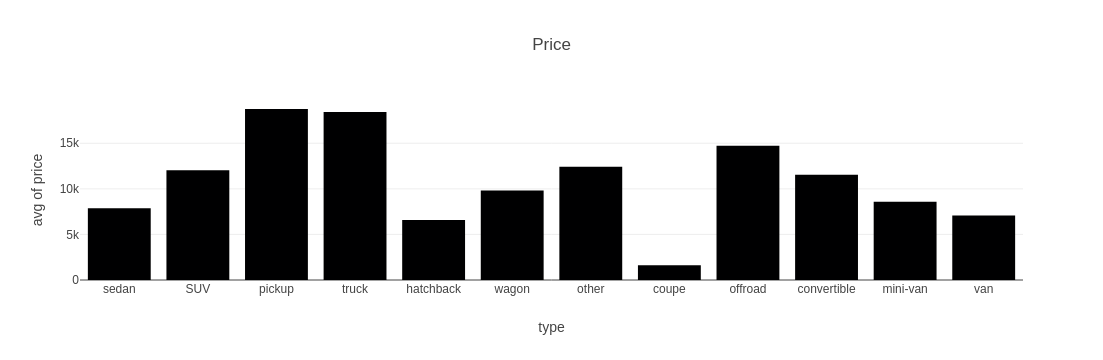

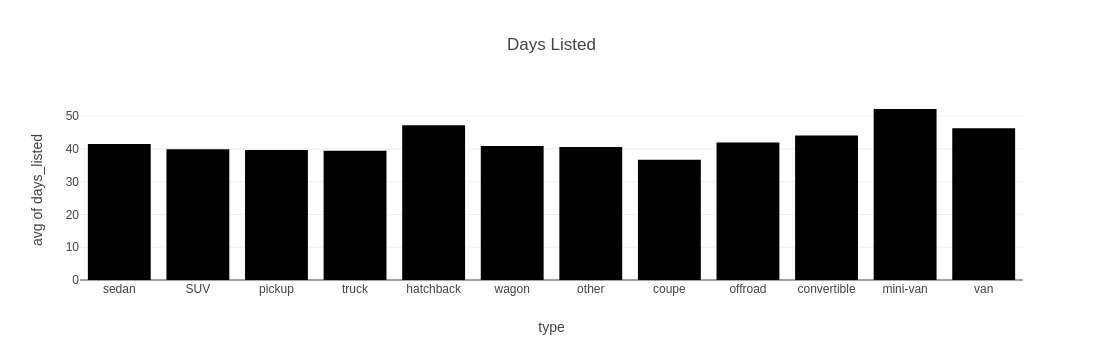

In [8]:
price_fig = px.histogram(hist_data, x=x_var, y='price', histfunc='avg', title='Price')
price_fig.show()
days_fig = px.histogram(hist_data, x=x_var, y='days_listed', histfunc='avg', title='Days Listed')
days_fig.show()